In [4]:
import schemdraw
import schemdraw.elements as elm

In [8]:
class Circuito:
    def __init__(self):
        self.elements =0 # Variável que conta a quantidade de elementos
        self.elements_list =[] #List that saves the elements
        self.nodes = set()   #Set() faz com que os nós armazenados no conjunto sejam únicos
        self.malhas=[]

    def element(self, Element: str, Start: tuple, End: tuple, Valor: float=0, Label: str = None):
        self.elements_list.append([Element, Start, End, Valor, Label])
        self.elements +=1
        #Adiciona nós aos conjuntos de nós
        self.nodes.add(Start)
        self.nodes.add(End)

    def exibir_elementos(self):
        for i, elemento in enumerate(self.elements_list):
            print(f"Elemento {i+1}: {elemento}")


    def draw(self):
        with schemdraw.Drawing() as d:
            for iten in self.elements_list:
                if(iten[0]=='Resistor'):
                    d.add(elm.Resistor().endpoints(iten[1], iten[2]).label(str(iten[3])+" Ω",loc='top').label(iten[4],loc='bot'))
                elif(iten[0]=='Capacitor'):
                    valor_capacitor = f"{int(iten[3].imag)}j" if iten[3].imag % 1 == 0 else f"{iten[3].imag}j"
                    d.add(elm.Capacitor().endpoints(iten[1], iten[2]).label(valor_capacitor + " Ω", loc='top').label(iten[4], loc='bot'))
                elif(iten[0]=='Inductor'):
                    d.add(elm.Inductor().endpoints(iten[1], iten[2]).label(str(iten[3])+" Ω",loc='top').label(iten[4],loc='bot'))
                elif(iten[0] == 'Voltage Source'):
                    d.add(elm.SourceV().endpoints(iten[1], iten[2]).label(str(iten[3])+"V",loc='top').label(iten[4],loc='bot'))
                elif(iten[0] == 'Wire'):
                    d.add(elm.Line().endpoints(iten[1], iten[2]))

    def map_nodes(self):
        #Criar um mapeamento para associar cada nó a um índice
        self.node_map = {}
        #Aqui vamos preencher o dicionário node_map
        # enumerate retorna 
        for idx, node in enumerate(self.nodes):  
            self.node_map[node] = idx #O nó é a chave do dicionário e o índice o valor   
        print("Mapeamento de nós:", self.node_map)      



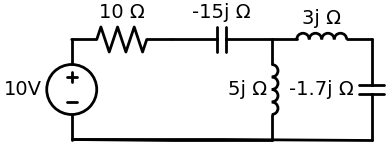

Mapeamento de nós: {(4, 0): 0, (0, 0): 1, (2, 0): 2, (6, -2): 3, (6, 0): 4, (4, -2): 5, (0, -2): 6}


In [9]:
circuito=Circuito()
circuito.element('Resistor',(0,0),(2,0),10,)
circuito.element('Capacitor',(2,0),(4,0),-15j)
circuito.element('Inductor',(4,0),(4,-2),5j,)
circuito.element('Wire',(4,-2),(0,-2))
circuito.element("Voltage Source",(0,-2),(0,0),10)
circuito.element("Inductor",(4,0),(6,0),3j)
circuito.element("Capacitor",(6,0),(6,-2),-1.7j)
circuito.element('Wire',(6,-2),(0,-2))

circuito.draw()
circuito.map_nodes()
